In [1]:
import numpy as np
import matplotlib.pyplot as plt
from __future__ import division

## Gauss Siedel Verification
A comparison of the Gallo Gauss Seidel solver with the analytic solution to the two group diffusion equations. 

### Problem Set Up 
(Taken from nptel.ac.in/courses/112101007/downloads/Lecturenotes/Lecture15.pdf)  
Assuming steady state, no fission, and no upscattering, the two group diffusion equations take the following form:
$$ D_1\nabla^2 \phi_1 - \Sigma_{r, 1 \rightarrow 1} \phi_1 + s_1^{'''} = 0$$
$$ D_2\nabla^2 \phi_2 - \Sigma_{r, 2 \rightarrow 2} \phi_2 + s_2^{'''} + \Sigma_{s, 1 \rightarrow 2} \phi_1 = 0$$

where the removal cross section $\Sigma_{r, g \rightarrow g} = \Sigma_{t, g} - \Sigma_{s, g \rightarrow g}$
With uniform source, we get
$$\nabla^2 \phi_1 - \frac{1}{L_1^2} \phi_1 = -\frac{1}{D_1}s_1^{'''}$$

where $ L_1^2 = \frac{D_1}{\Sigma_{r, 1 \rightarrow 1}}$. The solution takes the form,

$$\phi_1 = \phi_g + \phi_p $$ where the homogeneous solution, $\phi_g = k_1e^{-x/L_1} + k_2e^{x/L_1}$ and $\phi_p = \frac{L_1^2}{D_1}s_1^{'''} = \frac{s_1^{'''}}{\Sigma_{r, 1 \rightarrow 1}}. $

Using vaccum boundary conditions, $\phi_1(-a) = \phi_1(a) = 0$ and the form 

$$\phi_1 = k_1 e^{x/L_1} + k_2 e^{-x/L_1} + \frac{s_1^{'''}}{\Sigma_{r, 1 \rightarrow 1}} $$

We find constants, $k_1$ and $k_2$ to get the flux in group 1 as:

$$\phi_1 = \left(1 - \frac{cosh(x/L_1)}{cosh(a/L_1)}\right) \frac{s_1^{'''}}{\Sigma_{r, 1 \rightarrow 1}} $$

Rewrite equation 2 as:

$$ \nabla^2\phi_2 - \frac{1}{L_2^2}\phi_2 = -\frac{\Sigma_{s, 1\rightarrow 2}}{D_2}\phi_1 - \frac{s_2^{'''}}{D_2} $$

where $L_2^2 = \frac{D_2}{\Sigma_{r, 2 \rightarrow 2}}$. 

Plugging $\phi_1$ in to equation 2 gives 

$$ \nabla^2\phi_2 - \frac{1}{L_2^2}\phi_2 = -\frac{\Sigma_{s, 1\rightarrow 2}}{D_2}\left(1 - \frac{cosh(x/L_1)}{cosh(a/L_1)}\right) \frac{s_1^{'''}}{\Sigma_{r, 1 \rightarrow 1}}  - \frac{s_2^{'''}}{D_2} $$

Which we we rewrite as 

$$ \nabla^2\phi_2 - \frac{\phi_2}{L_2^2} = C_1 - C_2 cosh(\frac{x}{L_1})$$

where $ C_1 = -\frac{\Sigma_{s, 1\rightarrow 2}s_1^{'''}}{\Sigma_{r, 1 \rightarrow 1} D_2}  - \frac{s_2^{'''}}{D_2} $ and $C_2 = -\frac{s_1^{'''}\Sigma_{s, 1 \rightarrow 2}}{D_2\Sigma_{r, 1 \rightarrow 1}cosh(a/L_1)}$.

Wolfram Alpha gives the solution as:

$$\phi_2 = -\frac{C_1L_1^2L_2^2}{(L_1 - L_2)(L_1+L_2)} + \frac{C_1L_2^4}{(L_1 - L_2)(L_1 + L_2)} + \frac{L_1^2C_2L_2^2cosh(\frac{x}{L_1})}{(L_2 - L_2)(L_1 + L_2)} + C_4e^{-x/L_2} + C_5e^{x/L_2}$$

Using the following boundary conditions:
$$lim_{x\rightarrow a} \phi_2 = 0 $$
$$lim_{x\rightarrow -a} \phi_2 = 0 $$

This allows us to write a system of equations:

$$0 = E + C_4e^{-a/L_2} + C_5e^{a/L_2}$$
$$0 = E + C_4e^{a/L_2} + C_5e^{-a/L_2}$$


where $E = A + B + Dcosh(a/L_1) = A + B + Dcosh(-a/L_1)$, since $cosh(x)$ is an even function, and $A = -\frac{C_1L_1^2L_2^2}{(L_1 - L_2)(L_1+L_2)}$, $B = \frac{C_1L_2^4}{(L_1 - L_2)(L_1 + L_2)}$ and $D = \frac{(L_1^2C_2L_2^2}{(L_1 - L_2)(L_1 + L_2)}$

$$ C_4 = C_5 = -\frac{Ee^{a/L_2}}{1 + e^{2a/L_2}}$$

In [10]:
source = 1
a = 10
absorption = np.array([1, 1])
scattering = np.array([[11, 1], [0, 11]])
total = np.array([13, 12])
diffusion = 1/(3*total)
removal = np.array([total[0] - scattering[0, 0], total[1] - scattering[1, 1]])
L1 = np.sqrt(diffusion[0]/absorption[0])

In [11]:
x = np.arange(-a, a, .01)
phi_1 = (1 - np.cosh(x/L1)/np.cosh(a/L1))*source/removal[0]

In [12]:
L2 = np.sqrt(diffusion[1]/removal[1])
C1 = -source*scattering[0, 1]/(diffusion[1]*removal[0]) - source/diffusion[1]
C2 = -source*scattering[0, 1]/(diffusion[1]*removal[0]*np.cosh(a/L1))
A = -(C1*L1**2*L2**2)/((L1 - L2)*(L1 + L2))
B = (C1*L2**4)/((L1 - L2)*(L1 + L2))
D = (L1**2*C2*L2**2)/((L1 - L2)*(L1 + L2))
E = A + B + D*np.cosh(a/L1)
C4 = -(np.exp(a/L2)*E)/(1 + np.exp(2*a/L2))
C5 = C4
phi_2 = E + C4*np.exp(-x/L2) + C5*np.exp(x/L2)

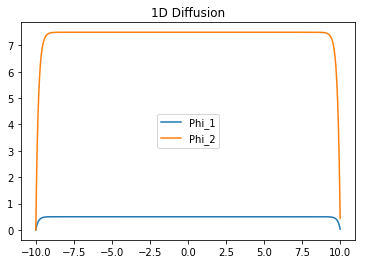

In [13]:
plt.plot(x, phi_1, label="Phi_1")
plt.plot(x, phi_2, label="Phi_2")
plt.title("1D Diffusion")
plt.legend()
plt.show()

## Gut Checks

### Analytic Max

In [14]:
np.max(phi_1)

0.5

In [15]:
np.max(phi_2)

7.500000000000007

### Compare with 

$$\phi_{1, max} = \frac{s_1^{'''}}{\Sigma_{r, 1 \rightarrow 1}}$$

$$ \phi_{2, max} = \frac{s_2^{'''}+\phi_{1, max}\Sigma_{s, 1\rightarrow 2}}{\Sigma_{r, 2 \rightarrow 2}}$$

In [16]:
phi1_max = source/removal[0]
phi1_max

0.5

In [17]:
(source + phi1_max*scattering[0, 1])/removal[1]

1.5

In [12]:
removal

array([11, 10])